<a href="https://colab.research.google.com/github/thiagofst/MB/blob/main/Maxwell_Boltzmann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import astropy.constants
import scipy.constants as const

from astropy.io import ascii

In [2]:
k = astropy.constants.k_B.value # Boltzmann constant

In [3]:
class maxwellboltzmann(object):
    
    def __init__(self, velocity, mass, temperature, boltzmann):
        super(maxwellboltzmann, self).__init__()
        self.v = velocity
        self.m = mass*astropy.constants.u.value
        self.t = temperature
        self.k = boltzmann
    
    # Maxwell-Boltzmann velocity distribution
    maxwell = lambda self: ((self.m/(2*np.pi*self.k*self.t))**1.5 *
                             4*np.pi *
                             self.v**2 *
                             np.exp(-self.m*self.v**2/(2*self.k*self.t)))
    # Mean speed
    mean_speed = lambda self: np.sqrt(8*self.k*self.t/(np.pi*self.m))

    # Root mean square speed
    rms_speed = lambda self: np.sqrt((3*self.k*self.t)/self.m)

In [4]:
def plotx(x_, y_, xlab = '', ylab = '', title = ''):
    fig, ax = plt.subplots()
    ax.grid(True, alpha = 0.4)
    ax.set_title(title, fontsize = 10, loc = 'right')
    ax.set_xlabel(xlab, fontsize = 10)
    ax.set_ylabel(ylab, fontsize = 10)
    ax.plot(x_, y_, '-k', lw = 1., label = '__nolabel__')
    plt.tight_layout()

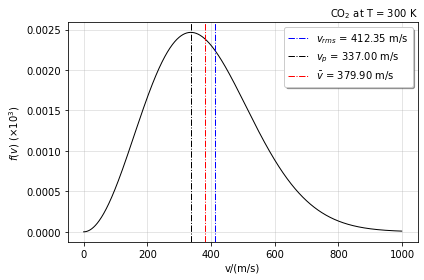

In [5]:
# Carbon Dioxide
v = np.arange(1e3)
carbon = maxwellboltzmann(v, 44.01, 300, k)
psp = v[np.argmax(carbon.maxwell())]

plotx(v, carbon.maxwell(), xlab = r'v/(m/s)', ylab = r'$f(v)~(\times 10^{3})$', title = r'CO$_{2}$ at T = %s K'%(carbon.t))

plt.axvline(carbon.rms_speed(), lw = 1., ls = 'dashdot', color = 'blue', label = r'$v_{rms}$ = %.2f m/s'%(carbon.rms_speed()))
plt.axvline(psp, lw = 1., ls = 'dashdot', color = 'black', label = r'$v_{p}$ = %.2f m/s'%(psp))
plt.axvline(carbon.mean_speed(), lw = 1., ls = 'dashdot', color = 'red', label = r'$\bar{v}$ = %.2f m/s'%(carbon.mean_speed()))

plt.legend(fontsize = 10, markerscale = 2, loc = 'best', shadow = 'True'); 
plt.savefig('maxwell_boltzmann_carbon.pdf');

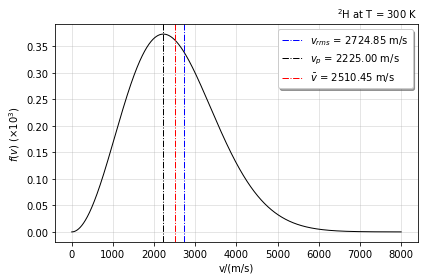

In [6]:
# Hydrogen atom
v = np.arange(8e3)
hydrogen = maxwellboltzmann(v, 1.00784, 300, k)
psp = v[np.argmax(hydrogen.maxwell())] # Probable speed

plotx(v, hydrogen.maxwell()*1000, xlab = r'v/(m/s)', ylab = r'$f(v)~(\times 10^{3})$', title = r'$^{2}$H at T = %s K'%(hydrogen.t))

plt.axvline(hydrogen.rms_speed(), lw = 1., ls = 'dashdot', color = 'blue', label = r'$v_{rms}$ = %.2f m/s'%(hydrogen.rms_speed()))
plt.axvline(psp, lw = 1., ls = 'dashdot', color = 'black', label = r'$v_{p}$ = %.2f m/s'%(psp))
plt.axvline(hydrogen.mean_speed(), lw = 1., ls = 'dashdot', color = 'red', label = r'$\bar{v}$ = %.2f m/s'%(hydrogen.mean_speed()))

plt.legend(fontsize = 10, markerscale = 2, loc = 'best', shadow = 'True'); 
plt.savefig('maxwell_boltzmann_hyd.pdf');

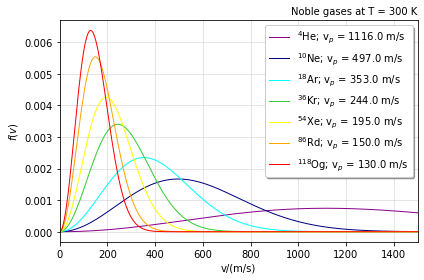

In [7]:
# Noble gases
v = np.arange(3e3)
helium = maxwellboltzmann(v, 4.002602, 300, k)
neon = maxwellboltzmann(v, 20.17970, 300, k)
argon = maxwellboltzmann(v, 39.94800, 300, k)
krypton = maxwellboltzmann(v, 83.79800, 300, k)
xenon = maxwellboltzmann(v, 131.2930, 300, k)
radon = maxwellboltzmann(v, 222.0000, 300, k)
oganesson = maxwellboltzmann(v, 294.0000, 300, k)
v = np.arange(3e3)

plt.figure(); plt.grid(True, alpha = 0.4); plt.xlim(0, 1.5e3)

plt.title('Noble gases at T = %s K'%(helium.t), fontsize = 10, loc = 'right')
plt.xlabel(r'v/(m/s)', fontsize = 10)
plt.ylabel(r'$f(v)$', fontsize = 10)

plt.plot(v, helium.maxwell()*1, ls = 'solid', lw = 1., c = 'darkmagenta', label = r'$^{4}$He; v$_{p}$ = %s m/s'%(v[np.argmax(helium.maxwell())])) # Helium
plt.plot(v, neon.maxwell()*1, ls = 'solid', lw = 1., c = 'navy', label = r'$^{10}$Ne; v$_{p}$ = %s m/s'%(v[np.argmax(neon.maxwell())])) # Neon
plt.plot(v, argon.maxwell()*1, ls = 'solid', lw = 1., c = 'cyan', label = r'$^{18}$Ar; v$_{p}$ = %s m/s'%(v[np.argmax(argon.maxwell())])) # Argon
plt.plot(v, krypton.maxwell()*1, ls = 'solid', lw = 1., c = 'limegreen', label = r'$^{36}$Kr; v$_{p}$ = %s m/s'%(v[np.argmax(krypton.maxwell())])) # Krypton
plt.plot(v, xenon.maxwell()*1, ls = 'solid', lw = 1., c = 'yellow', label = r'$^{54}$Xe; v$_{p}$ = %s m/s'%(v[np.argmax(xenon.maxwell())])) # Xenon
plt.plot(v, radon.maxwell()*1, ls = 'solid', lw = 1., c = 'orange', label = r'$^{86}$Rd; v$_{p}$ = %s m/s'%(v[np.argmax(radon.maxwell())])) # Radon
plt.plot(v, oganesson.maxwell()*1, ls = 'solid', lw = 1., c = 'red', label = r'$^{118}$Og; v$_{p}$ = %s m/s'%(v[np.argmax(oganesson.maxwell())])) # Oganesson

plt.legend(fontsize = 10, markerscale = 2, loc = 'upper right', shadow = 'True')

plt.tight_layout();  
plt.savefig('noble.pdf');